In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv", encoding= 'latin1')
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0


In [63]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateYearMonth'] = data['Date'].map(lambda date: 100 * date.year + date.month)
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Day,DateYearMonth
0,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,22,202001
1,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,23,202001
2,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,24,202001
3,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,25,202001
4,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,26,202001
...,...,...,...,...,...,...,...,...,...,...,...,...
558,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,2,202108
559,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,3,202108
560,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,4,202108
561,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,5,202108


In [8]:
april_data = data[(data['Date'] >= '2020-04-01') & (data['Date'] <= '2020-04-30')]
april_summary = april_data.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_countries = april_summary.sort_values(by='Confirmed', ascending=False).reset_index().head(8)
top_countries=top_countries.drop(columns=['index'])
top_countries

,Country/Region,Confirmed
0,US,19960815
1,Spain,5236777
2,Italy,4928524
3,Germany,3942925
4,France,3456319
5,United Kingdom,3328344
6,China,2500143
7,Iran,2255837


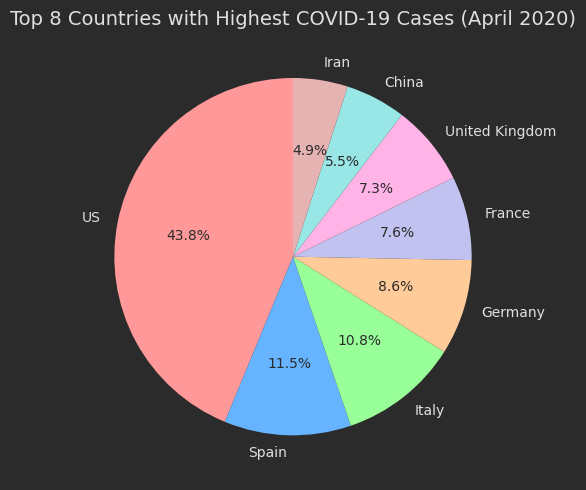

In [10]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


labels = top_countries['Country/Region']
sizes = top_countries['Confirmed']


wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#99e6e6', '#e6b3b3'])


for text in texts:
    text.set_color('#e0e0e0')
for autotext in autotexts:
    autotext.set_color('#2b2b2b')  

plt.title('Top 8 Countries with Highest COVID-19 Cases (April 2020)', fontsize=14, color='#e0e0e0')

plt.tight_layout()
plt.show()

In [64]:
data = data[data['Country/Region'] == 'Iran'].reset_index(drop=True)
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Day,DateYearMonth
0,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,22,202001
1,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,23,202001
2,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,24,202001
3,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,25,202001
4,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,26,202001
...,...,...,...,...,...,...,...,...,...,...,...,...
558,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,2,202108
559,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,3,202108
560,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,4,202108
561,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,5,202108


In [65]:
ndiran = data.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
nciran = data.groupby(['DateYearMonth'])['New cases'].sum().reset_index()

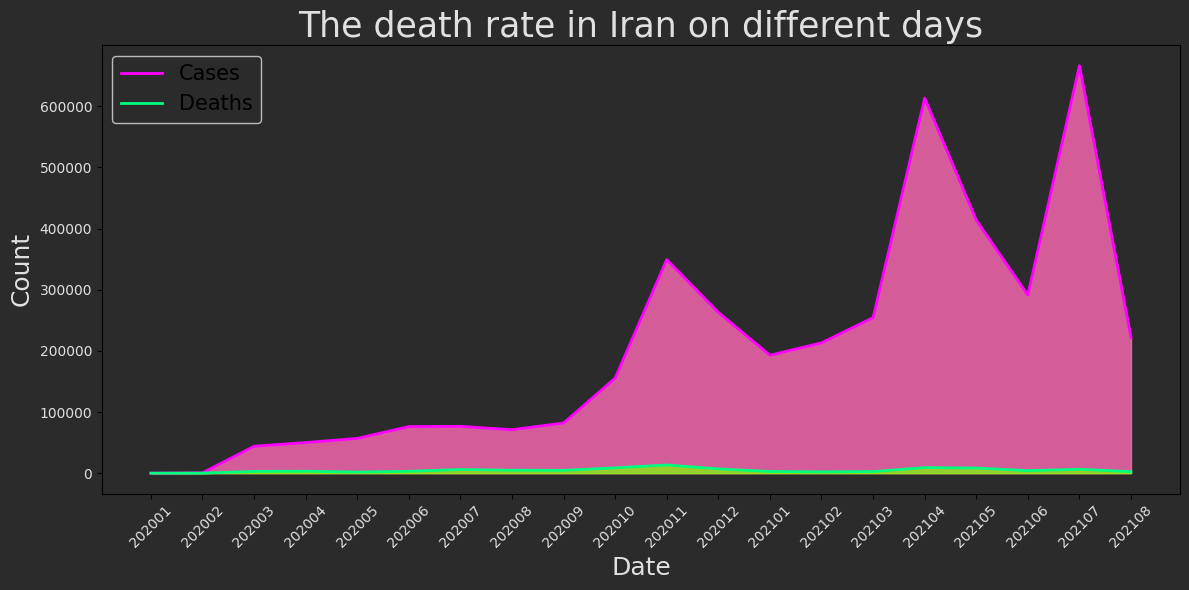

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


plt.plot(nciran['DateYearMonth'].to_numpy(dtype=str), nciran['New cases'], label='Cases', color='#ff00ff', linewidth=2)  
plt.fill_between(nciran['DateYearMonth'].to_numpy(dtype=str), nciran['New cases'], color='#ff69b4', alpha=0.8)  


plt.plot(ndiran['DateYearMonth'].to_numpy(dtype=str), ndiran['New deaths'], label='Deaths', color='#00ff7f', linewidth=2)  
plt.fill_between(ndiran['DateYearMonth'].to_numpy(dtype=str), ndiran['New deaths'], color='#7fff00', alpha=0.7)  

plt.title('The death rate in Iran on different days', fontsize=25, color='#e0e0e0')
plt.xlabel("Date", fontsize=18, color='#e0e0e0')
plt.ylabel("Count", fontsize=18, color='#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0', rotation=45)
plt.yticks(fontsize=10, color='#e0e0e0')


plt.legend(fontsize=15, facecolor='#2b2b2b', edgecolor='#e0e0e0')

plt.tight_layout()
plt.show()
